In [1]:
from src.sim import run
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

[{'N': 1, 'T': range(0, 500), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 500, 'i_wallet': 10000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'j_wallet': 0, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'p_wallet': 0, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80, 'k_wallet': 0, 'r_storage': 8000, 'r_in_bandwidth': 400, 'r_out_bandwidth': 80, 'r_wallet': 0, 'j_avail_to_i': 0.9, 'k_avail_to_i': 0.8, 'j_avail_to_k': 0.7, 'p_avail_to_i': 0.6, 'depth': 15, 'tax_%': 0.05, 'subsidy_escrow': 0.2, 'subsidy_treasury': 0.2, 'route_allocation': 0.1, 'store_allocation': 0.45, 'prove_allocation': 0.45, 'starting_treasury': 0, 'j_prove_likelihood': 0.95}}]
[{'N': 1, 'T': range(0, 500), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 500, 'i_wallet': 10000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'j_wallet': 0, 'p_storage': 4000, 'p_in_bandw

In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x00000208B750ED30>, <cadCAD.configuration.Configuration object at 0x00000208B750ED68>]
Configurations: [<cadCAD.configuration.Configuration object at 0x00000208B750ED30>, <cadCAD.configuration.Configuration object at 0x00000208B750ED68>]


In [3]:
print(experiments.dataset[0].head())

    timestamp message_array  \
0  2020-01-01   [[0, 0, 0]]   
11 2020-01-01   [[0, 0, 0]]   
22 2020-01-01   [[0, 0, 0]]   
33 2020-01-01   [[0, 0, 0]]   
44 2020-01-01   [[0, 0, 0]]   

                                         message_list  \
0            [[None, None, None], [None, None, None]]   
11  [[None, None, None], [None, None, None], [1594...   
22  [[None, None, None], [None, None, None], [1594...   
33  [[None, None, None], [None, None, None], [1594...   
44  [[None, None, None], [None, None, None], [1594...   

                                   file_list                demand  \
0   [[None, None, None], [None, None, None]]                     0   
11  [[None, None, None], [None, None, None]]  [1594588416, 135, 1]   
22  [[None, None, None], [None, None, None]]   [1594586912, 88, 1]   
33  [[None, None, None], [None, None, None]]  [1594588448, 136, 1]   
44  [[None, None, None], [None, None, None]]   [1594585632, 48, 1]   

                arrival                          

In [4]:
print(experiments.dataset[1].head())

    timestamp message_array  \
0  2020-01-01   [[0, 0, 0]]   
11 2020-01-01   [[0, 0, 0]]   
22 2020-01-01   [[0, 0, 0]]   
33 2020-01-01   [[0, 0, 0]]   
44 2020-01-01   [[0, 0, 0]]   

                                         message_list  \
0            [[None, None, None], [None, None, None]]   
11  [[None, None, None], [None, None, None], [1594...   
22  [[None, None, None], [None, None, None], [1594...   
33  [[None, None, None], [None, None, None], [1594...   
44  [[None, None, None], [None, None, None], [1594...   

                                   file_list                demand  \
0   [[None, None, None], [None, None, None]]                     0   
11  [[None, None, None], [None, None, None]]   [1594586304, 69, 1]   
22  [[None, None, None], [None, None, None]]  [1594588064, 124, 1]   
33  [[None, None, None], [None, None, None]]  [1594587552, 108, 1]   
44  [[None, None, None], [None, None, None]]   [1594584896, 25, 1]   

                arrival                          

In [5]:
first_key = max(experiments.dataset[0]['substep'])
last_time = max(experiments.dataset[0]['timestep'])
end_key = (len(experiments.dataset[0]) / max(experiments.dataset[0]['run']) -1) * max(experiments.dataset[0]['substep'])
twenty_time = max(experiments.dataset[0]['substep']) * 10 *2
fifty_time =  max(experiments.dataset[0]['substep']) * 50

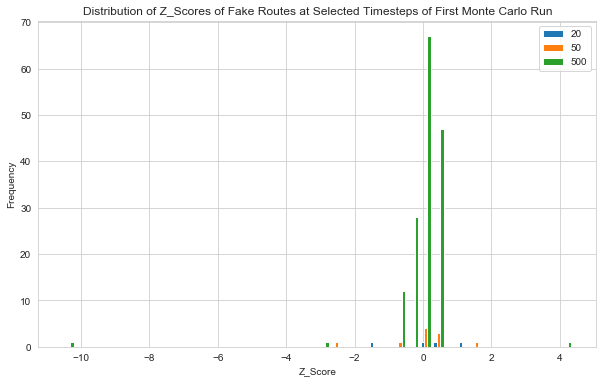

In [6]:
plt.figure(figsize=(10,6))
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z_Scores of Fake Routes at Selected Timesteps of First Monte Carlo Run')

plt.hist([experiments.dataset[0]['f_hat'][twenty_time], experiments.dataset[0]['f_hat'][fifty_time], \
          experiments.dataset[0]['f_hat'][end_key]], bins = 40, label =['20','50',str(last_time)])
plt.legend()
plt.show()

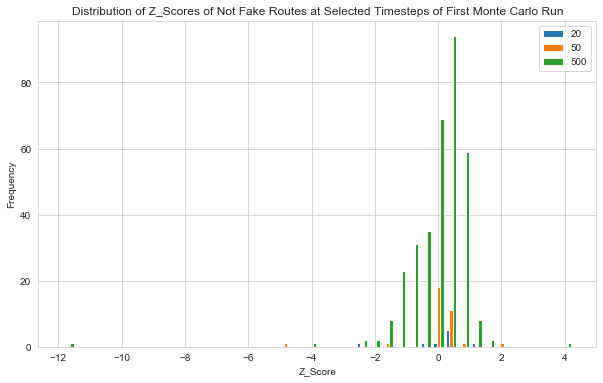

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z_Scores of Not Fake Routes at Selected Timesteps of First Monte Carlo Run')

plt.hist([experiments.dataset[0]['zees'][twenty_time], experiments.dataset[0]['zees'][fifty_time], \
          experiments.dataset[0]['zees'][end_key]], bins = 40, label =['20','50',str(last_time)])
plt.legend()
plt.show()

In [8]:
len(experiments.dataset[0]['f_hat'][end_key])

157

In [9]:
len(experiments.dataset[0]['zees'][end_key])

336

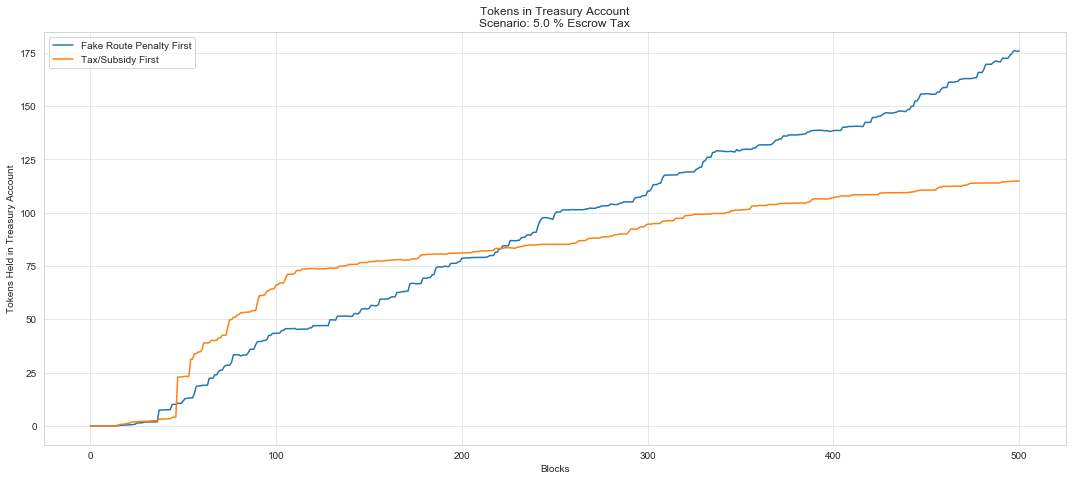

In [10]:
experiments = experiments.sort_values(['tax_%'])
cols = 1
rows = 1
cc_idx = 0
config_labels = ['Fake Route Penalty First','Tax/Subsidy First']

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['tax_%']
    cc_label = experiments.iloc[cc_idx]['tax_%']
    sub_experiments = experiments[experiments['tax_%']==cc]
    cc_idx += len(sub_experiments)
    
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df = df.groupby('timestep').agg({'treasury': ['min', 'mean', 'max']}).reset_index()
        
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue
        
        ax = axs
        title = 'Tokens in Treasury Account' + '\n' + 'Scenario: ' + str(cc_label*100)  + ' % Escrow Tax'
        ax.set_title(title)
        ax.set_ylabel('Tokens Held in Treasury Account')
        df.plot(x='timestep', y=('treasury','mean'), label=config_labels[i], ax=ax, legend=True)
        ax.fill_between(df.timestep, df[('treasury','min')], df[('treasury','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()